In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = 'D:/New_Life/PAPER/Play/'
data = pd.read_excel(path+'DATALOG_1.xlsx', usecols='C:V',skiprows=2)
jp_data = pd.read_excel(path+'zf2_popc_20190731_1.xlsx',usecols='A:AU',skiprows=23)

In [4]:
data.shape

(16491, 20)

In [5]:
jp_data.columns

Index(['date', 'ist', 'date [y-m-d GMT]', ' time [h:m:s GMT]', ' milliseconds',
       ' seconds since midnight [GMT]', ' elapsed minutes',
       ' altitude (from iMet PTU) [km]', ' iMet pressure [mb]',
       ' iMet air temperature (corrected) [deg C]',
       ' iMet air temperature (raw) [deg C]', ' iMet humidity [RH %]',
       ' iMet frostpoint [deg C]', ' iMet internal temperature [deg C]',
       ' iMet battery voltage [V]', ' iMet theta [K]',
       ' iMet temperature (of pressure sensor) [deg C]',
       ' iMet temperature (of humidity sensor) [deg C]',
       ' iMet ascent rate [m/s]', ' iMet water vapor mixing ratio [ppmv]',
       ' iMet total column water [mm]', ' O3 partial pressure [mPa]',
       ' O3 mixing ratio [ppmv]', ' total column ozone [DU]',
       ' total column ozone with extrapolation [DU]', ' O3 cell current [uA]',
       ' O3 pump temperature [deg C]', ' O3 pump current [mA]',
       ' O3 battery voltage [V]', ' GPS latitude', ' GPS longitude',
       ' GPS

In [6]:
print(jp_data[' time [h:m:s GMT]'][0])
print(data['ist'][0])

19:00:00
00:00:00


In [7]:
jp_datetime = jp_data['date'].astype(str) + ' '+jp_data['ist'].astype(str) 
datetime = data['date'].astype(str) + ' '+data['ist'].astype(str)

In [8]:
datetime[0]

'2019-08-01 00:00:00'

In [9]:
jp_datetime = pd.to_datetime(jp_datetime , format = '%Y-%m-%d %H:%M:%S') 
datetime = pd.to_datetime(datetime, format = '%Y-%m-%d %H:%M:%S')

In [10]:
datetime
jp_datetime.shape

(14269,)

In [11]:
new_data = jp_data.merge(data, on = ['ist'])

In [12]:
new_data.to_excel('new_data.xlsx')

In [13]:
new_data.columns

Index(['date_x', 'ist', 'date [y-m-d GMT]', ' time [h:m:s GMT]',
       ' milliseconds', ' seconds since midnight [GMT]', ' elapsed minutes',
       ' altitude (from iMet PTU) [km]', ' iMet pressure [mb]',
       ' iMet air temperature (corrected) [deg C]',
       ' iMet air temperature (raw) [deg C]', ' iMet humidity [RH %]',
       ' iMet frostpoint [deg C]', ' iMet internal temperature [deg C]',
       ' iMet battery voltage [V]', ' iMet theta [K]',
       ' iMet temperature (of pressure sensor) [deg C]',
       ' iMet temperature (of humidity sensor) [deg C]',
       ' iMet ascent rate [m/s]', ' iMet water vapor mixing ratio [ppmv]',
       ' iMet total column water [mm]', ' O3 partial pressure [mPa]',
       ' O3 mixing ratio [ppmv]', ' total column ozone [DU]',
       ' total column ozone with extrapolation [DU]', ' O3 cell current [uA]',
       ' O3 pump temperature [deg C]', ' O3 pump current [mA]',
       ' O3 battery voltage [V]', ' GPS latitude', ' GPS longitude',
       ' G

In [24]:
ist = pd.to_datetime(new_data['ist'], format = '%H:%M:%S')
ist

0       1900-01-01 00:30:00
1       1900-01-01 00:30:01
2       1900-01-01 00:30:02
3       1900-01-01 00:30:04
4       1900-01-01 00:30:05
                ...        
11714   1900-01-01 04:42:09
11715   1900-01-01 04:42:10
11716   1900-01-01 04:42:17
11717   1900-01-01 04:42:36
11718   1900-01-01 04:42:37
Name: ist, Length: 11719, dtype: datetime64[ns]

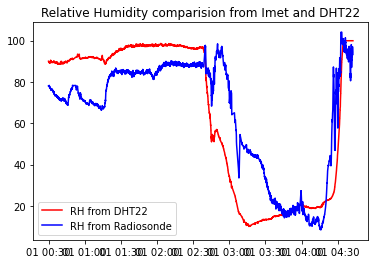

In [30]:
# tempd 

plt.plot(ist,new_data['RHD'],c='red',label='RH from DHT22')
plt.plot(ist,new_data[' iMet humidity [RH %]'],c='blue',label = 'RH from Radiosonde')
plt.legend()
plt.title('Relative Humidity comparision from Imet and DHT22')
plt.savefig('BATAL_2019_RH.jpg',dpi=1080)

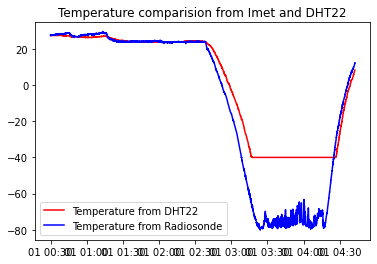

In [31]:
plt.plot(ist,new_data['TEMPD'],c='red',label='Temperature from DHT22')
plt.plot(ist,new_data[' iMet air temperature (corrected) [deg C]'],c='blue',label = 'Temperature from Radiosonde')
plt.legend()
plt.title('Temperature comparision from Imet and DHT22')
plt.savefig('BATAL_2019_TEMPERATURE.jpg',dpi=1080)

In [222]:
time = pd.to_datetime('2019-07-31 5:30:00', format = '%Y-%m-%d %H:%M:%S')